# Data Extraction


## Import data from website

In [1]:
#get the data from the site and unzip the contents to battery_data
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data
!pip install ipyfilechooser #widget to choose files or location on a desktop

ERROR: Invalid requirement: '#widget'


## Import libraries

In [2]:
import datetime
import pandas as pd
from scipy.io import loadmat
from pandas import DataFrame

## Input from user

In [3]:
print("Input which battery you need to extract data from. Choose from the following")
print("Battery Number: B0005,B0006,B0007,B0018")
B = input()

Input which battery you need to extract data from. Choose from the following
Battery Number: B0005,B0006,B0007,B0018
B0018


In [4]:
#define a function for extracting discharge and charge data
def disch_data(battery):
  mat = loadmat('battery_data/' + battery + '.mat') #get the .mat file
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0])) #get the length of the data from number of cycles
  c = 0 #set a variable to zero
  disdataset = [] #create an empty list for discharge data
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i] #get each row of the cycle
    if row['type'][0] == 'discharge': #if the row is a dicharge cycle
      ambient_temperature = row['ambient_temperature'][0][0] #get temp,date_time stamp,capacity,voltage,current etc,.
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        disdataset.append([c + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
        capacity_data.append([c + 1, ambient_temperature, date_time, capacity])
      c = c + 1
  print(disdataset[0])
  return [pd.DataFrame(data=disdataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current', 'voltage', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

def charge_data(battery): #similarly write a fn for charge data
  mat = loadmat('battery_data/' + battery + '.mat')
  c = 0
  chdataset = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'charge' :
            
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_charge = data[0][0]['Current_charge'][0][j]
        voltage_charge = data[0][0]['Voltage_charge'][0][j]
        time = data[0][0]['Time'][0][j]
        chdataset.append([c + 1, ambient_temperature, date_time,
                        voltage_measured, current_measured,
                        temperature_measured, current_charge,
                        voltage_charge, time])
      c = c + 1
  print(chdataset[788])
  return chdataset

## Charge cycles

In [5]:
chdataset = charge_data(B)
chdf=pd.DataFrame(data=chdataset,columns=['cycle', 'ambient_temperature', 'datetime', 
                                'voltage_measured','current_measured',
                                'temperature_measured','current',
                                'voltage', 'time'])
pd.set_option('display.max_columns', 10)
chdf

[1, 24, datetime.datetime(2008, 7, 7, 12, 26, 45), 4.199114407695108, 0.3979857346270783, 24.824364773359807, 0.398, 4.397, 2207.031]


,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,24,2008-07-07 12:26:45,3.865713,0.001014,23.735721,0.000,-0.007,0.000
1,1,24,2008-07-07 12:26:45,3.447651,-4.034445,23.743956,-4.036,1.553,2.484
2,1,24,2008-07-07 12:26:45,4.005559,1.517435,23.773723,1.507,4.721,5.109
3,1,24,2008-07-07 12:26:45,4.015989,1.514558,23.777077,1.507,4.737,7.562
4,1,24,2008-07-07 12:26:45,4.023230,1.517284,23.792710,1.507,4.743,10.062
...,...,...,...,...,...,...,...,...,...
279805,134,24,2008-08-20 05:49:31,4.180760,-0.001612,23.160264,0.000,-0.007,9956.984
279806,134,24,2008-08-20 05:49:31,4.181660,-0.002837,23.166556,0.000,-0.007,9964.031
279807,134,24,2008-08-20 05:49:31,4.182311,-0.002382,23.163557,0.000,-0.007,9971.078
279808,134,24,2008-08-20 05:49:31,4.182857,-0.002210,23.153626,0.000,-0.007,9978.125


In [6]:
chdf.describe()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current,voltage,time
count,279810.000000,279810.0,279808.000000,279808.000000,279808.000000,279810.000000,279810.000000,279810.000000
mean,57.870859,24.0,4.148328,0.573842,25.268980,0.569547,4.218308,5117.810137
std,38.949441,0.0,0.106813,0.625002,2.155149,0.621977,0.999241,3061.033252
min,1.000000,24.0,2.888926,-4.508828,21.810170,-4.513000,-0.007000,0.000000
25%,23.000000,24.0,4.185769,0.058263,23.532452,0.057000,4.235000,2417.430250
50%,54.000000,24.0,4.196978,0.228645,24.488283,0.224000,4.316000,5057.203000
75%,90.000000,24.0,4.199437,1.511974,26.965574,1.507000,4.651000,7762.996000
max,134.000000,24.0,4.299586,1.536047,36.186651,1.507000,4.996000,10815.375000


## Discharge cycles

In [7]:
disdf,capacity = disch_data(B)
pd.set_option('display.max_columns', 10)
disdf

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 15, 15, 28), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,24,2008-07-07 15:15:28,1.855005,4.188109,0.000131,23.819520,0.0006,0.000,0.000
1,1,24,2008-07-07 15:15:28,1.855005,4.188196,0.001459,23.828807,0.0006,4.203,9.422
2,1,24,2008-07-07 15:15:28,1.855005,3.977432,-2.005672,23.844944,1.9988,3.029,19.578
3,1,24,2008-07-07 15:15:28,1.855005,3.961974,-2.012206,23.925577,1.9988,3.026,29.016
4,1,24,2008-07-07 15:15:28,1.855005,3.949835,-2.012005,24.010628,1.9988,3.015,38.485
...,...,...,...,...,...,...,...,...,...,...
34861,132,24,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359
34862,132,24,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546
34863,132,24,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640
34864,132,24,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750


In [8]:
disdf.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
count,34866.000000,34866.0,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,59.962657,24.0,1.584405,3.501219,-1.842923,31.083216,1.833923,2.408419,1547.119848
std,37.957008,0.0,0.156427,0.250037,0.552445,3.649983,0.549609,0.744116,908.373277
min,1.000000,24.0,1.341051,2.278634,-2.026719,22.350256,0.000400,0.000000,0.000000
25%,27.000000,24.0,1.428376,3.382813,-2.009485,28.462162,1.998600,2.459000,763.339250
50%,57.000000,24.0,1.605737,3.497088,-2.008341,31.121895,1.998600,2.589000,1537.289500
75%,92.000000,24.0,1.711846,3.662815,-2.007073,33.982822,1.998800,2.751000,2312.964500
max,132.000000,24.0,1.855005,4.193543,0.014306,38.878688,1.999000,4.209000,3434.891000


## Combined data

In [9]:
cycling_data = pd.concat([chdf, disdf])
cycling_data=cycling_data.sort_values(['cycle'], ascending=[True])
cycling_data

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-07-07 12:26:45,3.865713,0.001014,23.735721,0.000,-0.007,0.000,NaN
2116,1,24,2008-07-07 12:26:45,4.196156,0.035708,23.832808,0.035,4.224,6092.312,NaN
2117,1,24,2008-07-07 12:26:45,4.196116,0.040315,23.826886,0.035,4.224,6095.297,NaN
2118,1,24,2008-07-07 12:26:45,4.196078,0.035163,23.834637,0.035,4.224,6098.281,NaN
2119,1,24,2008-07-07 12:26:45,4.196172,0.034721,23.836994,0.035,4.224,6101.265,NaN
...,...,...,...,...,...,...,...,...,...,...
278871,134,24,2008-08-20 05:49:31,4.199328,0.532663,26.417114,0.526,4.457,3222.062,NaN
278870,134,24,2008-08-20 05:49:31,4.199371,0.532286,26.442725,0.526,4.457,3214.781,NaN
278869,134,24,2008-08-20 05:49:31,4.198920,0.532523,26.450505,0.526,4.457,3207.578,NaN
278878,134,24,2008-08-20 05:49:31,4.199071,0.509162,26.320494,0.502,4.446,3272.969,NaN


In [11]:
#Choose test data file
#import libraries
from IPython.display import display
from ipyfilechooser import FileChooser

print("Select the test file folder location: ")

# Create a FileChooser widget
Explorer = FileChooser('/Users/Narmadha balraj/')

#display the FileChooser widget
display(Explorer)

Select the test file folder location: 


FileChooser(path='C:\Users\Narmadha balraj', filename='', title='', show_hidden=False, select_desc='Select', c…

In [12]:
#save the df as csv in the selected location
cycling_data.to_csv(Explorer.selected + "NASA_cycle_dataset_" + B + ".csv")

## Voltage plot

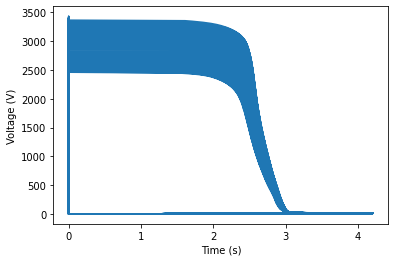

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(disdf['voltage'], disdf['time'], '-')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()